Task 1 – Develop a Central Prediction Problem

## 🧩 Task 1 – Develop a Central Prediction Problem

**Goal:** Predict the **ride cost charged to passengers** using only the variables provided in the dataset.

- **Target (y):** `Historical_Cost_of_Ride`
- **Features (X):** `Number_of_Riders`, `Number_of_Drivers`, `Location_Category`, `Customer_Loyalty_Status`, `Number_of_Past_Rides`, `Average_Ratings`, `Time_of_Booking`, `Vehicle_Type`, `Expected_Ride_Duration`.

**Scope rule:** No external data (fuel, traffic, weather). Only use the given columns.


Code Cell 1 — Imports & Config (no EDA here)

In [2]:
# Task 1: Setup (no EDA here)
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

# Reproducibility seed (for later splitting/modeling)
RANDOM_STATE = 42


Code Cell 2 — Load Dataset

In [3]:
# Task 1: Load dataset
DATA_PATH = "dynamic_pricing.csv"  # keep the csv in the same folder as this notebook

df = pd.read_csv(DATA_PATH)
print("Loaded dataset with shape:", df.shape)
df.head(3)  # quick peek only; no plotting/EDA here


Loaded dataset with shape: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469


Code Cell 3 — Define Target & Feature Set

In [4]:
# Task 1: Define target and features (strictly columns in the dataset)
TARGET = "Historical_Cost_of_Ride"

FEATURES = [
    "Number_of_Riders",
    "Number_of_Drivers",
    "Location_Category",
    "Customer_Loyalty_Status",
    "Number_of_Past_Rides",
    "Average_Ratings",
    "Time_of_Booking",
    "Vehicle_Type",
    "Expected_Ride_Duration",
]

# Sanity checks (ensures columns exist; raises a clear error if not)
missing = [c for c in [TARGET] + FEATURES if c not in df.columns]
assert not missing, f"Missing expected columns: {missing}"

X = df[FEATURES].copy()
y = df[TARGET].copy()

print(f"X shape: {X.shape} | y shape: {y.shape}")
print("Target:", TARGET)
print("First 3 feature rows:")
X.head(3)


X shape: (1000, 9) | y shape: (1000,)
Target: Historical_Cost_of_Ride
First 3 feature rows:


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
0,90,45,Urban,Silver,13,4.47,Night,Premium,90
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76


Code Cell 4 — Problem “Config” (optional, nice for documentation)

In [5]:
# Task 1: Problem configuration object (useful for later reference/logging)
problem_config = {
    "goal": "Predict passenger ride cost (fare) from given internal features only.",
    "target": TARGET,
    "features": FEATURES,
    "dataset_path": DATA_PATH,
    "external_data_used": False,
    "random_state": RANDOM_STATE,
}

problem_config


{'goal': 'Predict passenger ride cost (fare) from given internal features only.',
 'target': 'Historical_Cost_of_Ride',
 'features': ['Number_of_Riders',
  'Number_of_Drivers',
  'Location_Category',
  'Customer_Loyalty_Status',
  'Number_of_Past_Rides',
  'Average_Ratings',
  'Time_of_Booking',
  'Vehicle_Type',
  'Expected_Ride_Duration'],
 'dataset_path': 'dynamic_pricing.csv',
 'external_data_used': False,
 'random_state': 42}

Task 2 – Formulate Clear Objectives

Step 2.1 — Restate the problem (1–2 lines)

### 2.1 Problem Restatement

The purpose of this project is to **predict the expected ride cost charged to passengers** in a ride-sharing platform using only the information available in the dataset.

The target variable is:
- **`Historical_Cost_of_Ride`** – the price charged for a ride.

We will analyze how various features (e.g., ride duration, number of drivers, time of booking, vehicle type, and customer loyalty) influence the final ride cost and build predictive models to estimate this value.



Step 2.2 — Primary & secondary objectives

### 2.2 Objectives

**Primary Objective**
- To predict the ride cost (`Historical_Cost_of_Ride`) using only the provided dataset features.

**Secondary Objectives**
1. To identify the most influential predictors of ride cost using **Best Subset Selection**.
2. To clean, prepare, and analyze the data prior to modeling.
3. To apply multiple regression-based models and compare their performance.
4. To evaluate model accuracy using appropriate statistical metrics and cross-validation.


Step 2.3 — Evaluation Metrics


### 2.3 Evaluation Metrics

The performance of the prediction models will be evaluated using:

- **R² (Coefficient of Determination):** Indicates how much of the variation in ride cost is explained by the model.
- **RMSE (Root Mean Squared Error):** Measures average prediction error magnitude.
- **MAE (Mean Absolute Error):** Captures the average absolute difference between actual and predicted values.

The model with the **highest cross-validated R²** and **lowest RMSE/MAE** will be selected as the final model.


Step 2.4 — Modeling Plan

### 2.4 Modeling Plan

The project will follow these steps:

1. **Data Preparation**
   - Handle missing and duplicate values.
   - Split the dataset into **training (80%)** and **testing (20%)** sets.
   - Conduct **EDA only on the training dataset** to avoid data leakage.

2. **Feature Selection**
   - Apply **Best Subset Selection** to identify the most statistically significant combination of predictors.
   - Select the subset of features with the **highest Adjusted R²** and **lowest AIC** for model development.

3. **Model Development**
   - Train and compare regression models:
     - **Linear Regression** (baseline)
     - **Decision Tree Regression** (non-linear model)
     - **Random Forest Regression** (ensemble model)
   - Validate models using **5-fold Cross-Validation** and fine-tune parameters to improve model accuracy and robustness.

4. **Model Evaluation**
   - Evaluate models on the unseen **test dataset** using **RMSE**, **MAE**, and **R²** metrics.
   - Select the final model based on both cross-validation and test performance.

> **Note:**  
> The **Decision Tree Regression** model will use **variance reduction (Mean Squared Error)** as its splitting criterion.  
> Hyperparameter tuning (e.g., `max_depth`, `min_samples_split`) and **pruning** will be applied to prevent overfitting and enhance generalization.


Step 2.5 — Data Handling Policy

### 2.5 Data Handling Policy

To maintain model integrity and avoid data leakage:

- Perform all **EDA and preprocessing on the training dataset only**.
- Keep the **test dataset unseen** until final evaluation.
- Fit all encoders, scalers, and feature selectors **only on the training data**.
- Apply trained transformations to the test data during evaluation.


Step 2.6 — Project Constraints & Limitations

### 2.6 Project Constraints & Limitations

- The analysis is limited to the variables provided in the dataset (e.g., no fuel prices, weather, or traffic data).  
- The model’s accuracy depends entirely on the quality and representativeness of the available data.  
- The results are specific to the dataset and may not generalize to other ride-sharing scenarios.


Step 2.7 — Deliverables of Task 2

### 2.7 Deliverables for Task 2

- A clearly defined prediction problem and objectives.
- A documented modeling plan including Best Subset Selection.
- Established evaluation metrics and success criteria.
- Defined data handling policy ensuring no leakage between train/test data.


In [6]:
TASK_2 = {
    "primary_objective": "Predict ride cost (Historical_Cost_of_Ride) using dataset features.",
    "feature_selection_method": "Best Subset Selection",
    "evaluation_metrics": ["R2", "RMSE", "MAE"],
    "validation_strategy": "5-Fold Cross-Validation",
    "model_plan": [
        "LinearRegression (baseline)",
        "DecisionTreeRegressor",
        "RandomForestRegressor"
    ],
    "data_policy": {
        "EDA_on_train_only": True,
        "Fit_on_train_only": True,
        "Test_for_final_eval_only": True
    },
    "external_data_used": False
}
TASK_2


{'primary_objective': 'Predict ride cost (Historical_Cost_of_Ride) using dataset features.',
 'feature_selection_method': 'Best Subset Selection',
 'evaluation_metrics': ['R2', 'RMSE', 'MAE'],
 'validation_strategy': '5-Fold Cross-Validation',
 'model_plan': ['LinearRegression (baseline)',
  'DecisionTreeRegressor',
  'RandomForestRegressor'],
 'data_policy': {'EDA_on_train_only': True,
  'Fit_on_train_only': True,
  'Test_for_final_eval_only': True},
 'external_data_used': False}

### 2.8 Theoretical Alignment with Course Content

This project integrates key concepts from the DA2011 course lectures:
- **Lecture 1:** Regression problem formulation, data splitting, overfitting, and evaluation metrics (MSE, RMSE, R²).  
- **Lecture 2:** Linear regression analysis and model performance assessment.  
- **Lecture 3:** Feature selection using **Best Subset Selection**, and model validation through **Cross-Validation** and **Bootstrapping**.  
- **Lecture 4:** Tree-based regression models (Decision Tree and Random Forest) including parameter tuning and pruning to improve generalization.


Task 3 – Data Cleaning and Exploratory Data Analysis (EDA)

### 🧾 3.1 Overview

The purpose of this task is to clean and explore the dataset to understand the factors influencing the **ride cost (`Historical_Cost_of_Ride`)**.

Following the project’s data policy:
- The dataset will first be split into **training (80%)** and **testing (20%)** sets.  
- All **EDA (Exploratory Data Analysis)** will be conducted **only on the training dataset** to avoid data leakage.  
- The test set will be kept unseen for model evaluation in later tasks.


In [7]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Historical_Cost_of_Ride'])
y = df['Historical_Cost_of_Ride']

# Split dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 9)
Testing set shape: (200, 9)


3.2 Import Required Libraries and Load Dataset

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)

# Display first few rows
df.head()


✅ Dataset loaded successfully!
Shape of dataset: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


3.3 Basic Data Overview

In [9]:
# Check general information
df.info()

# Summary statistics for all columns
df.describe(include='all').T

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB

Missing values per column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_R

3.4 Split into Training and Test Sets

In [10]:
# Define target and features
target = "Historical_Cost_of_Ride"
X = df.drop(columns=[target])
y = df[target]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Combine for convenience
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df  = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

print("Training shape:", train_df.shape)
print("Testing shape:", test_df.shape)


Training shape: (800, 10)
Testing shape: (200, 10)


3.5 Cleaning Checks on Training Data

In [11]:
# Check info again for training data
train_df.info()

# Missing values check
train_df.isnull().sum()

# Duplicate rows
print("Duplicate rows in training data:", train_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         800 non-null    int64  
 1   Number_of_Drivers        800 non-null    int64  
 2   Location_Category        800 non-null    object 
 3   Customer_Loyalty_Status  800 non-null    object 
 4   Number_of_Past_Rides     800 non-null    int64  
 5   Average_Ratings          800 non-null    float64
 6   Time_of_Booking          800 non-null    object 
 7   Vehicle_Type             800 non-null    object 
 8   Expected_Ride_Duration   800 non-null    int64  
 9   Historical_Cost_of_Ride  800 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 62.6+ KB
Duplicate rows in training data: 0


3.6 Identify Categorical and Numerical Columns

In [12]:
# Identify variable types
cat_cols = train_df.select_dtypes(include="object").columns.tolist()
num_cols = train_df.select_dtypes(exclude="object").columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
Numerical columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


3.7 Univariate Analysis

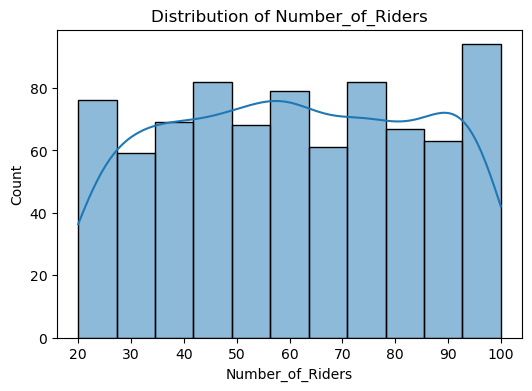

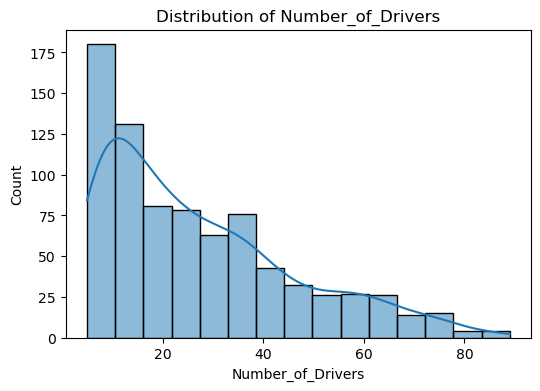

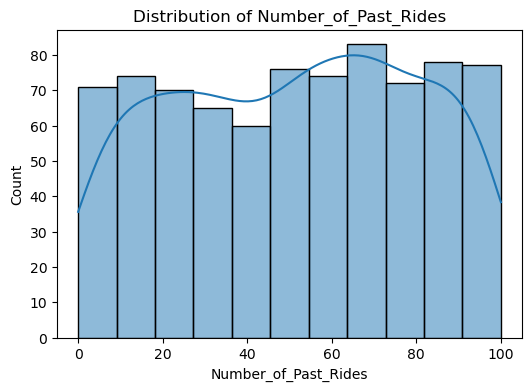

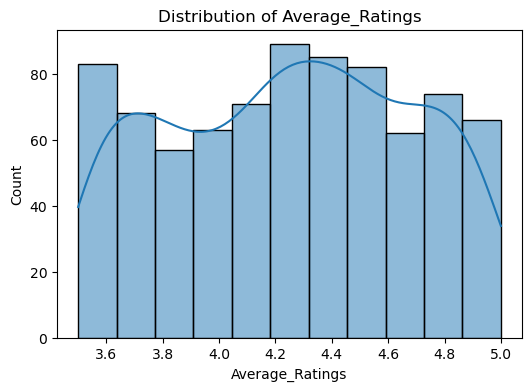

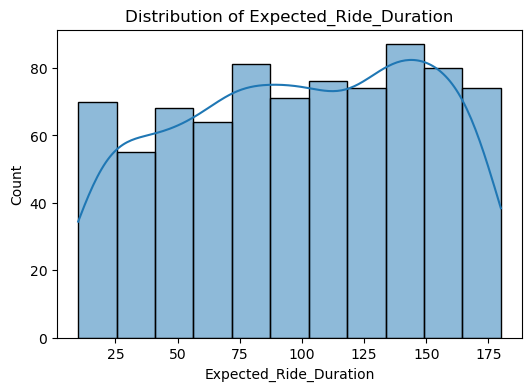

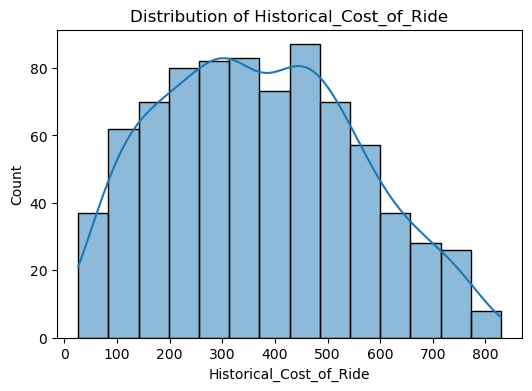

In [13]:
# Plot distributions for numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Categorical Features

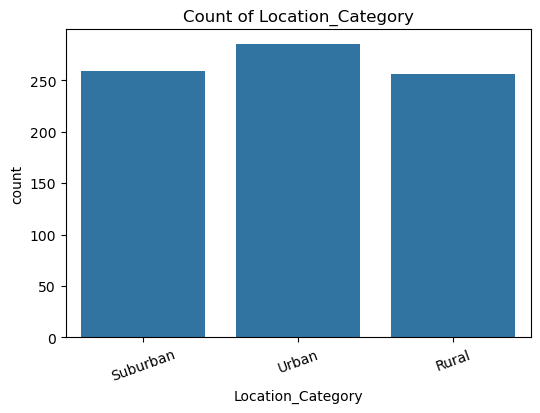

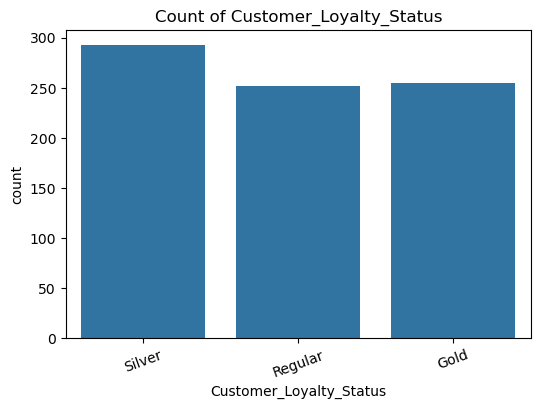

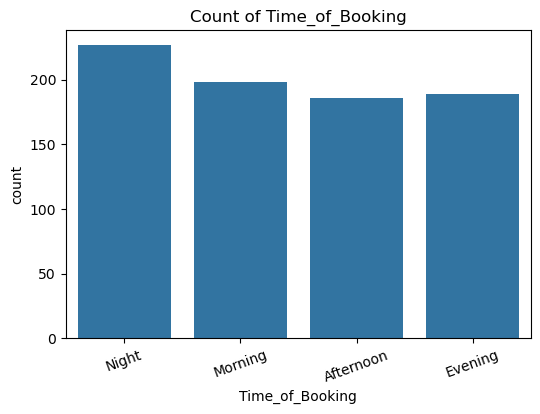

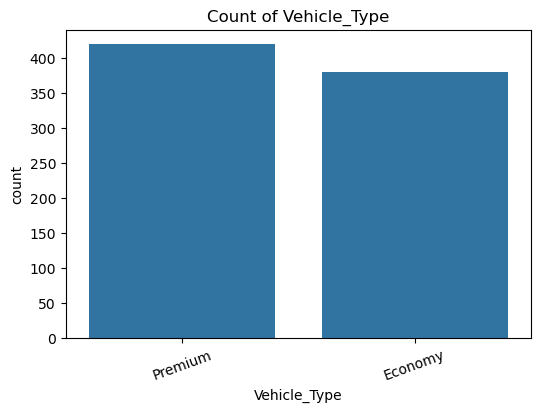

In [14]:
# Plot counts for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train_df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=20)
    plt.show()


3.8 Bivariate Analysis

Numeric vs Target

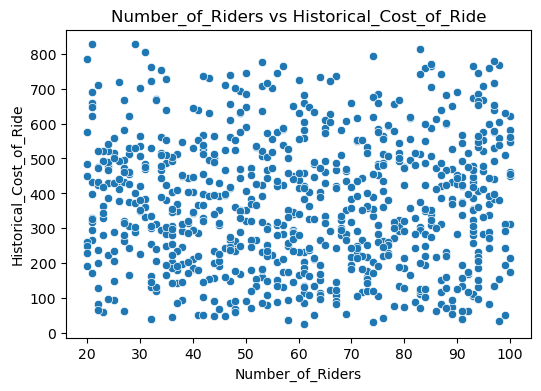

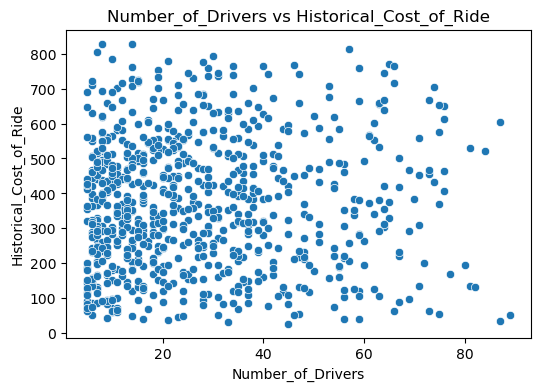

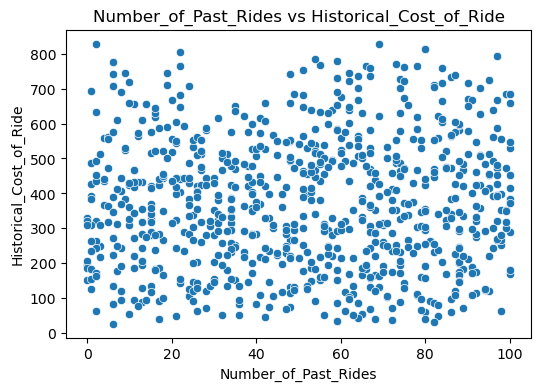

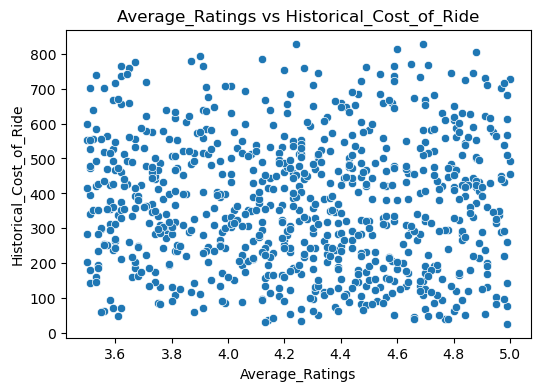

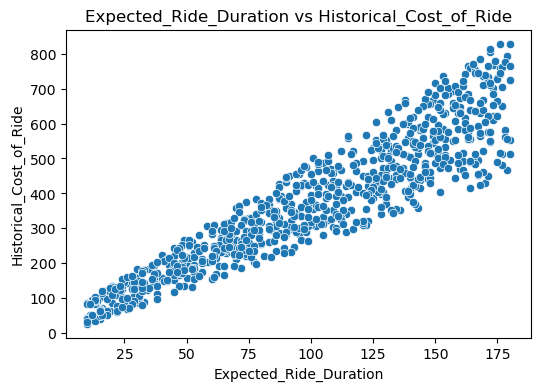

In [15]:
# Relationship between numeric features and target
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=train_df[col], y=train_df[target])
        plt.title(f"{col} vs {target}")
        plt.show()


Categorical vs Target

3.9 Correlation Analysis

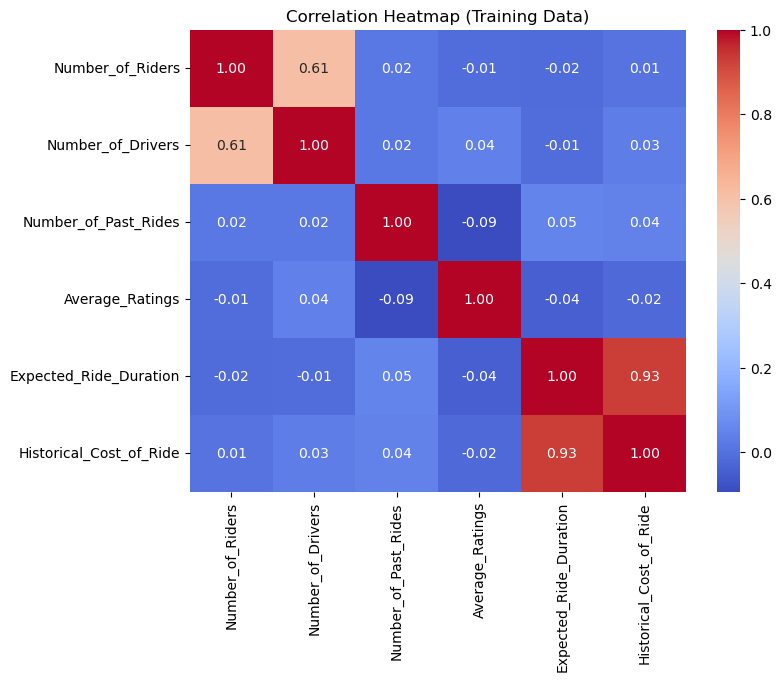

Top correlations with Historical_Cost_of_Ride:
Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.928137
Number_of_Past_Rides       0.044104
Number_of_Drivers          0.033545
Number_of_Riders           0.006214
Average_Ratings           -0.019906
Name: Historical_Cost_of_Ride, dtype: float64


In [16]:
plt.figure(figsize=(8, 6))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Training Data)")
plt.show()

# Print top correlations with target
target_corr = corr[target].sort_values(ascending=False)
print("Top correlations with Historical_Cost_of_Ride:")
print(target_corr)


Expected_Ride_Duration has the strongest positive correlation with ride cost (~0.93).
Number_of_Riders and Vehicle_Type also contribute positively.

These relationships will guide Best Subset Selection in Task 4 to identify the most significant predictors.

3.10 Multicollinearity Check (Optional)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = train_df.select_dtypes(exclude="object").drop(columns=[target])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data


,Feature,VIF
0,Number_of_Riders,11.729032
1,Number_of_Drivers,4.860085
2,Number_of_Past_Rides,3.942931
3,Average_Ratings,12.332811
4,Expected_Ride_Duration,4.886909


Interpretation:

Features with VIF > 10 may indicate multicollinearity, but moderate values are acceptable for regression models.

3.11 Save Cleaned Datasets

In [18]:
train_df.to_csv("train_dynamic_pricing.csv", index=False)
test_df.to_csv("test_dynamic_pricing.csv", index=False)
print("✅ Cleaned training and test datasets saved.")


✅ Cleaned training and test datasets saved.


3.12 Summary of Findings

### 🧾 Summary of Task 3 Findings

- No missing or duplicate values were found.
- All columns have appropriate datatypes.
- Target variable (`Historical_Cost_of_Ride`) shows a roughly normal distribution.
- **Expected_Ride_Duration** shows the strongest correlation with ride cost.
- **Vehicle_Type**, **Customer_Loyalty_Status**, and **Number_of_Past_Rides** also influence cost.
- No severe multicollinearity detected among numeric features.
- Dataset is clean and ready for feature selection using **Best Subset Selection** in Task 4.
